In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

def ecdf(x):
    return np.sort(x), np.linspace(0,1,len(x))

In [2]:
def plot_curves(data,
                outdir,
                groupby,
                colorby):
    try:
        os.mkdir(outdir)
    except:
        pass
        
    if type(groupby) == str:
        ncol = groupby
    else:
        ncol = '_'.join(groupby)
        data[ncol] = data[groupby].agg(''.join, axis=1)

    for g in set(data[ncol]):
        subdf = data[data[ncol] == g]
        fig, ax  = plt.subplots(4,8, figsize=(24,12))

        for i, v in enumerate(set(subdf['metab'])):
            x = math.trunc(i / 8)
            y = int(i - 8*x)
            sns.scatterplot(data=subdf[subdf['metab'] == v],
                            x='hours',
                            y='blanked_590',
                            hue=colorby,
                            palette='colorblind',
                            legend=False,
                            ax=ax[x,y])
            sns.regplot(data=subdf[subdf['metab'] == v],
                        x='hours',
                        y='blanked_590',
                        scatter=False,
                        color='black',
                        ci=90,
                        ax=ax[x,y])
            
            ax[x,y].set_ylabel(g+' blanked_590')
            ax[x,y].set_title(v)

        plt.tight_layout()
        plt.savefig(outdir+'/'+g+'_scatter.png',format='png',dpi=300)

    plt.close()
    return print('All scatters saved to: '+outdir+'/')

In [30]:
df = pd.read_csv('defaultOutput/waterLarvaeTidy.csv')
df['diapause_specimen'] = df['diapause'] + df['specimen']

df.head()

,Well,590,metab,timepoint,sample,diapause,specimen,rep,blanked_590,hours,diapause_specimen
0,A1,0.310,Water,24h,4_L_1,4,L,1,0.0,24,4L
1,A5,0.271,Water,24h,4_L_1,4,L,1,0.0,24,4L
2,A9,0.334,Water,24h,4_L_1,4,L,1,0.0,24,4L
3,A2,0.206,β-Methyl-D-Glucoside,24h,4_L_1,4,L,1,0.0,24,4L
4,A6,0.221,β-Methyl-D-Glucoside,24h,4_L_1,4,L,1,0.0,24,4L


All scatters saved to: dataViz/


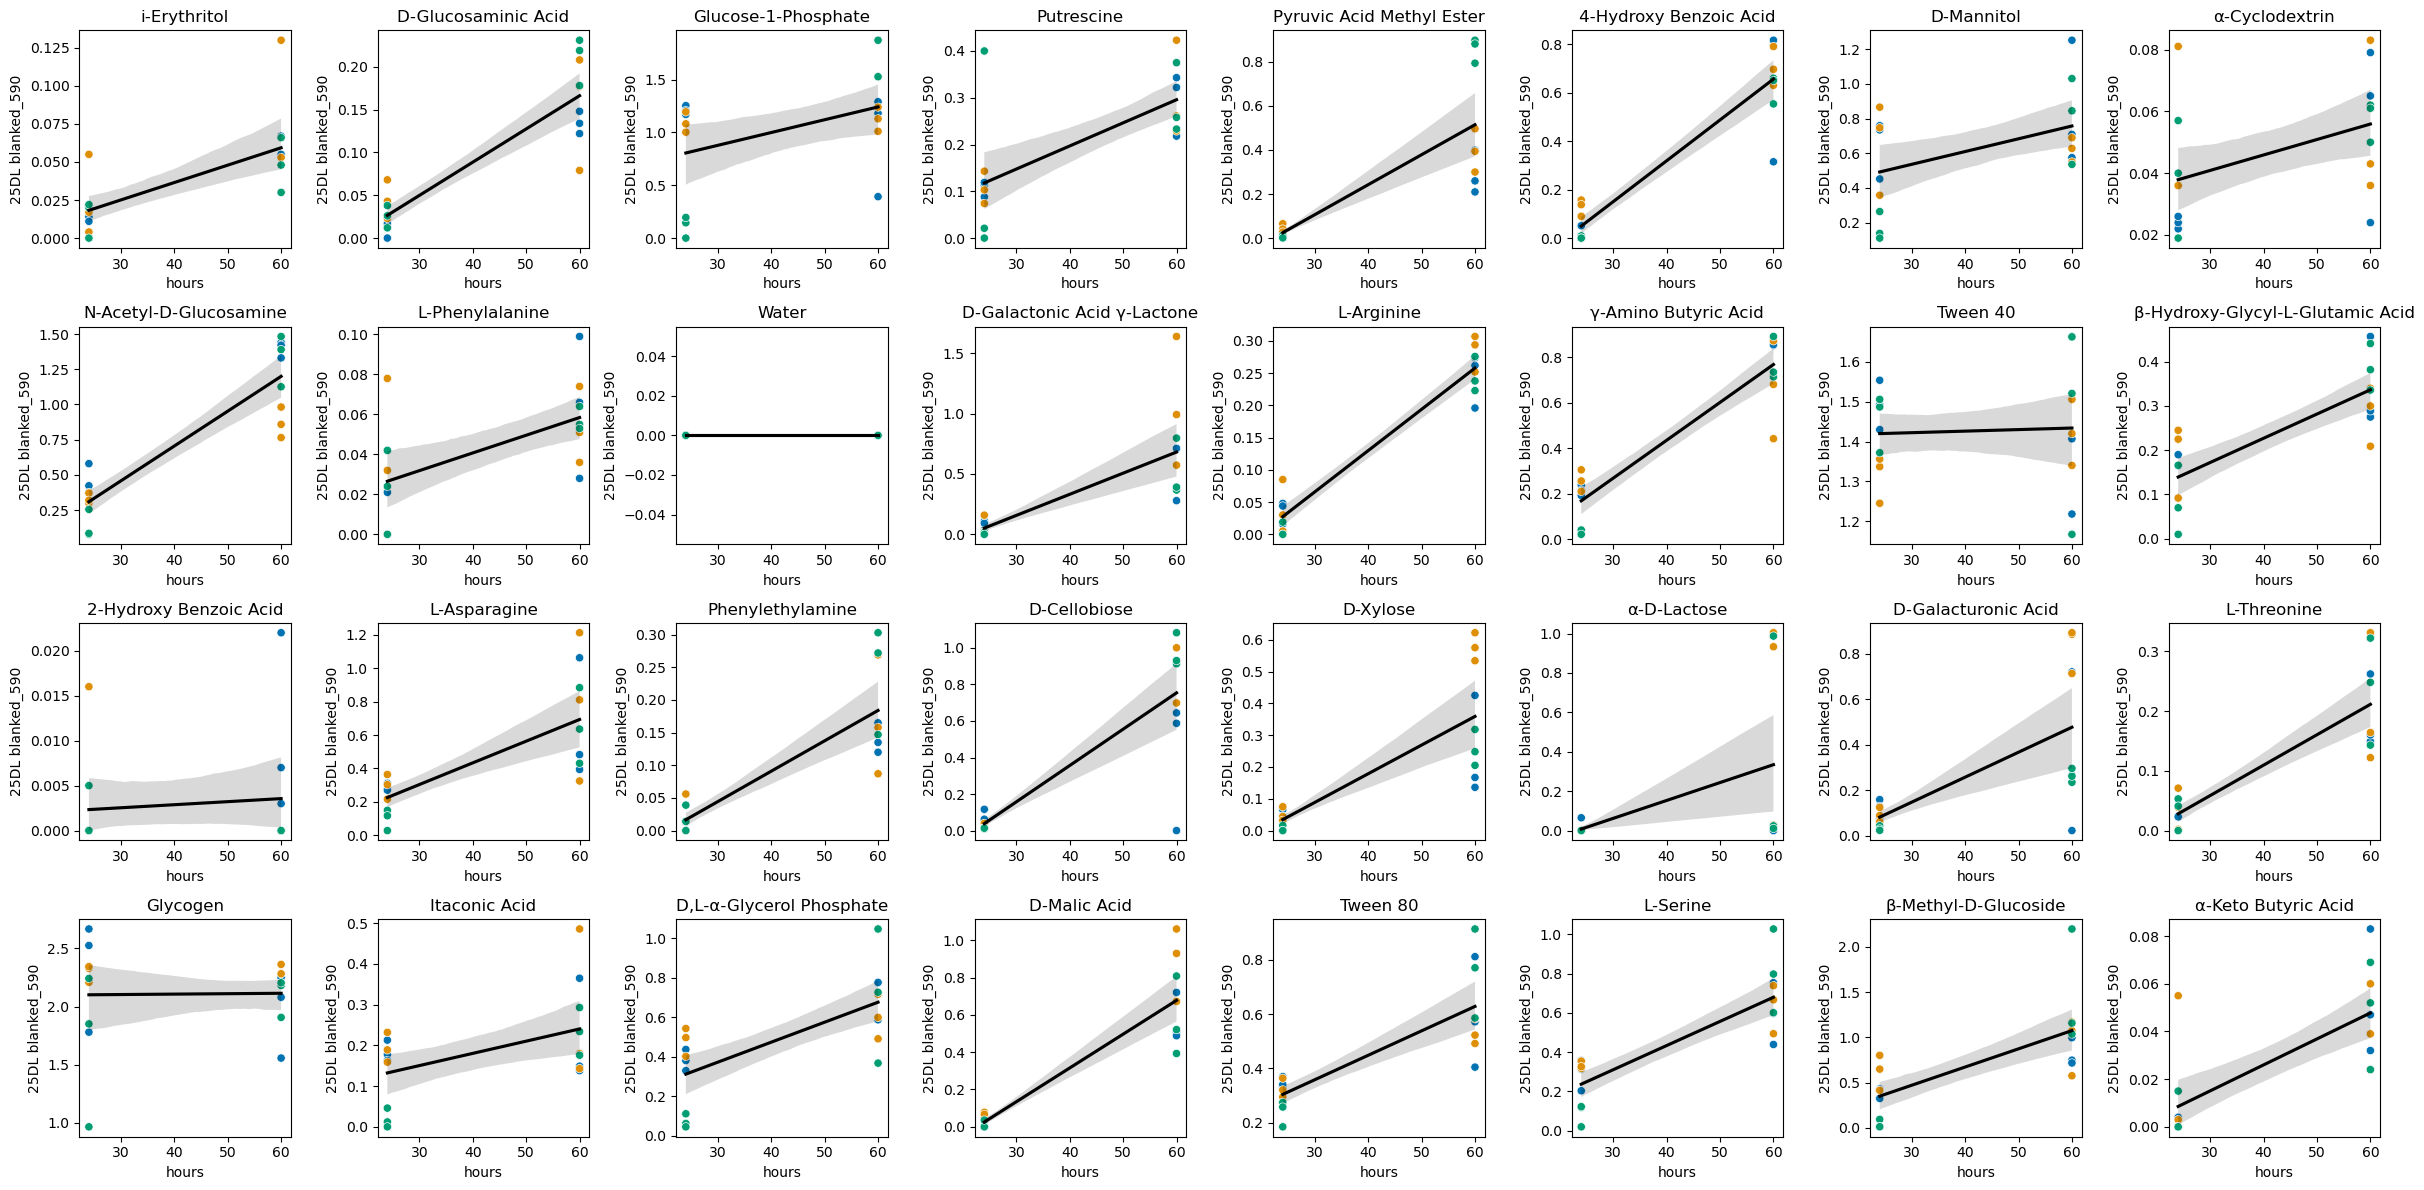

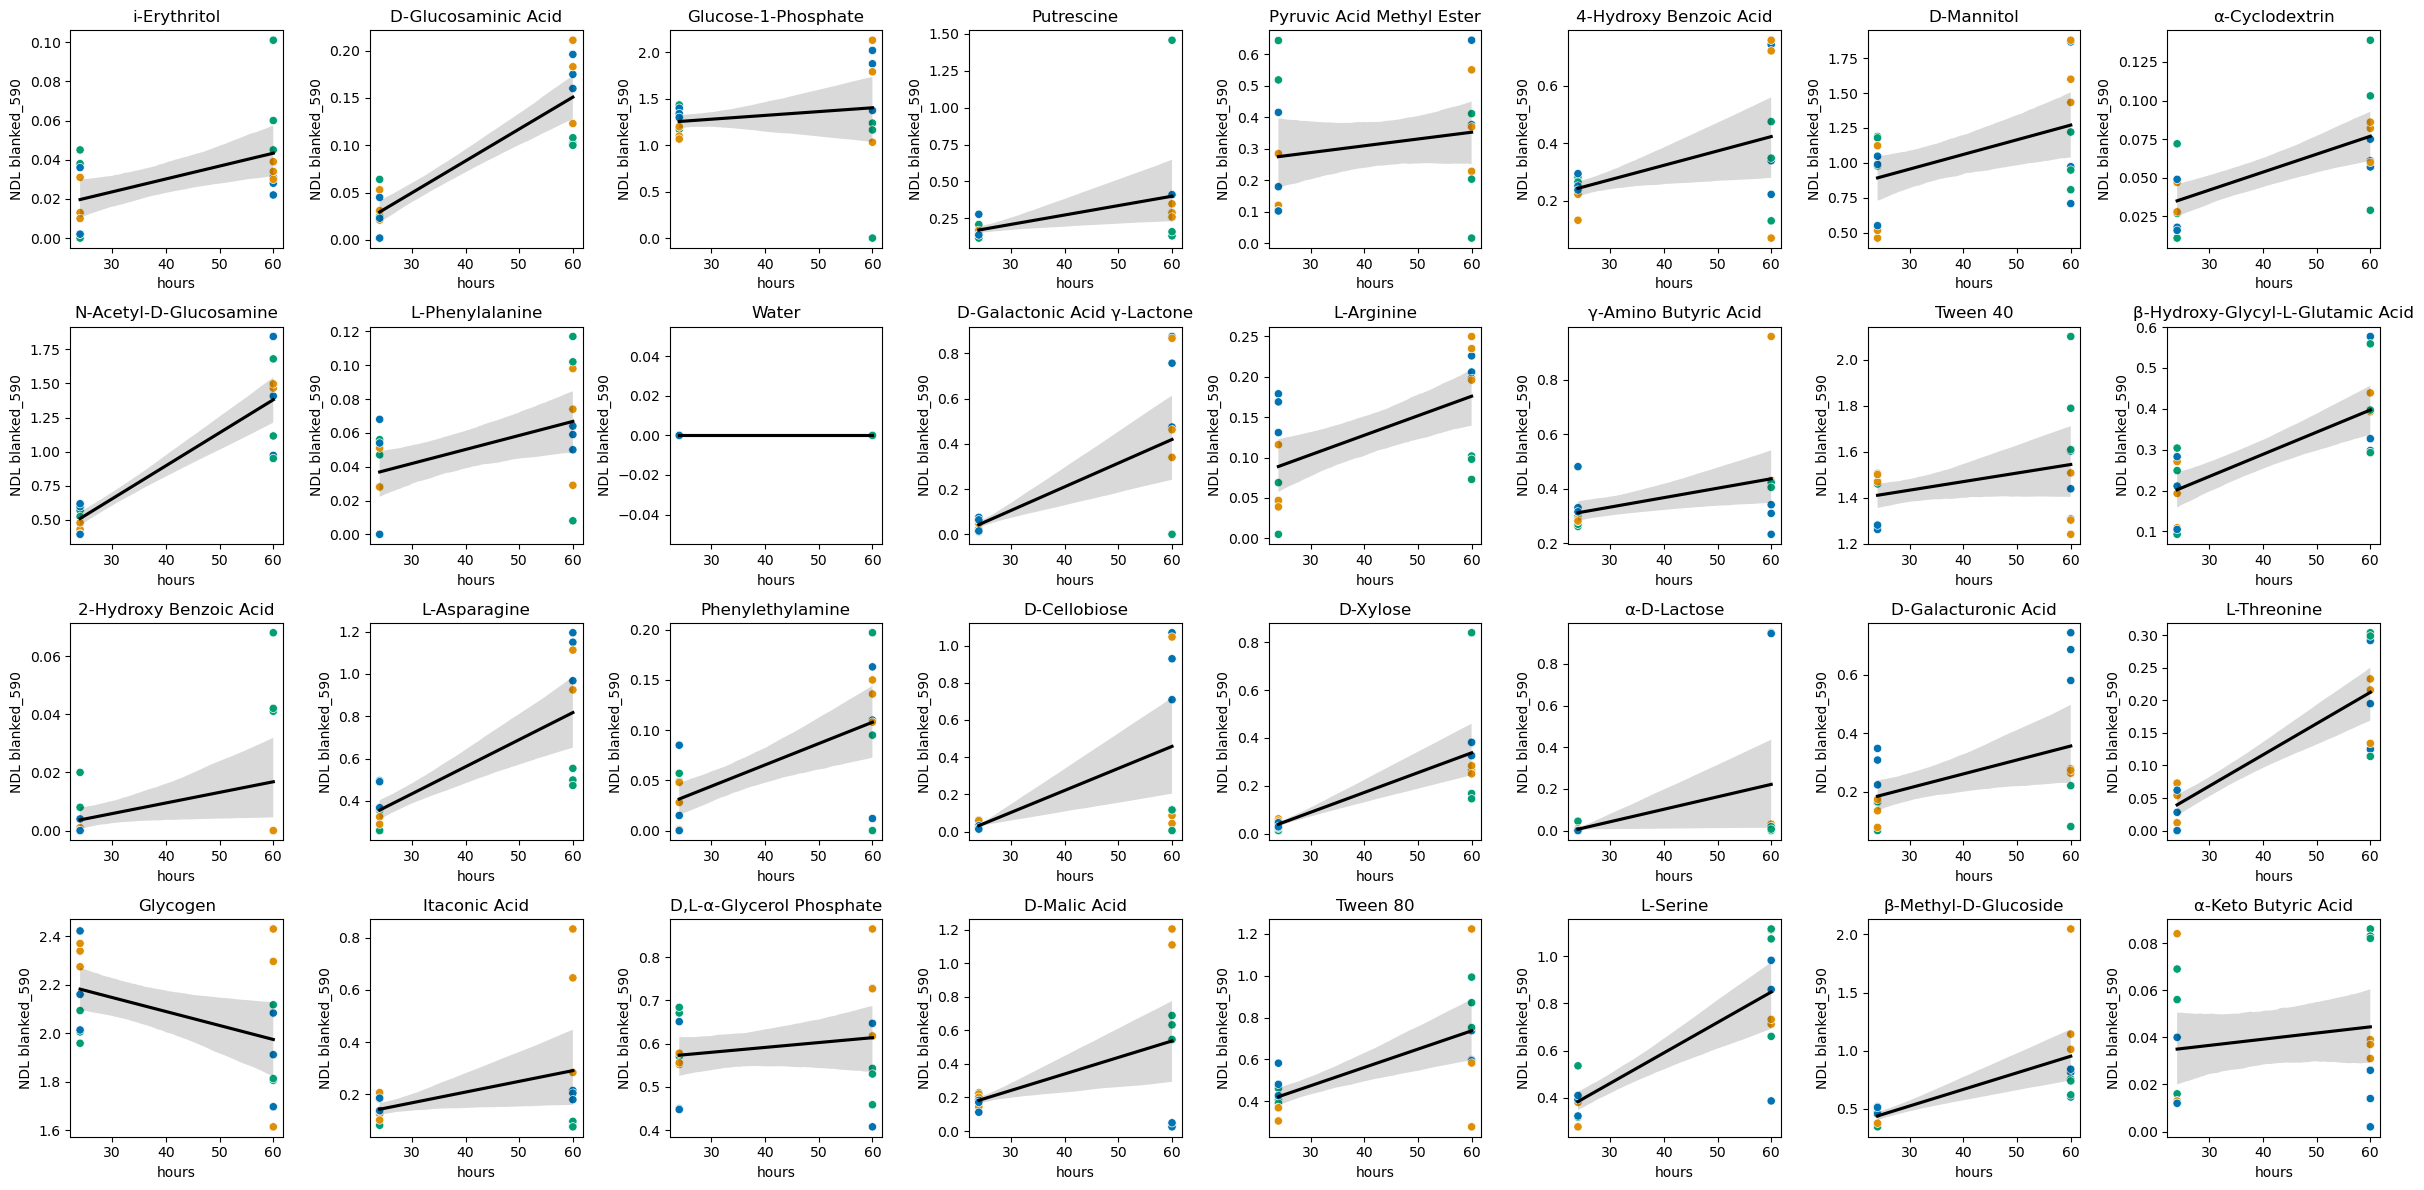

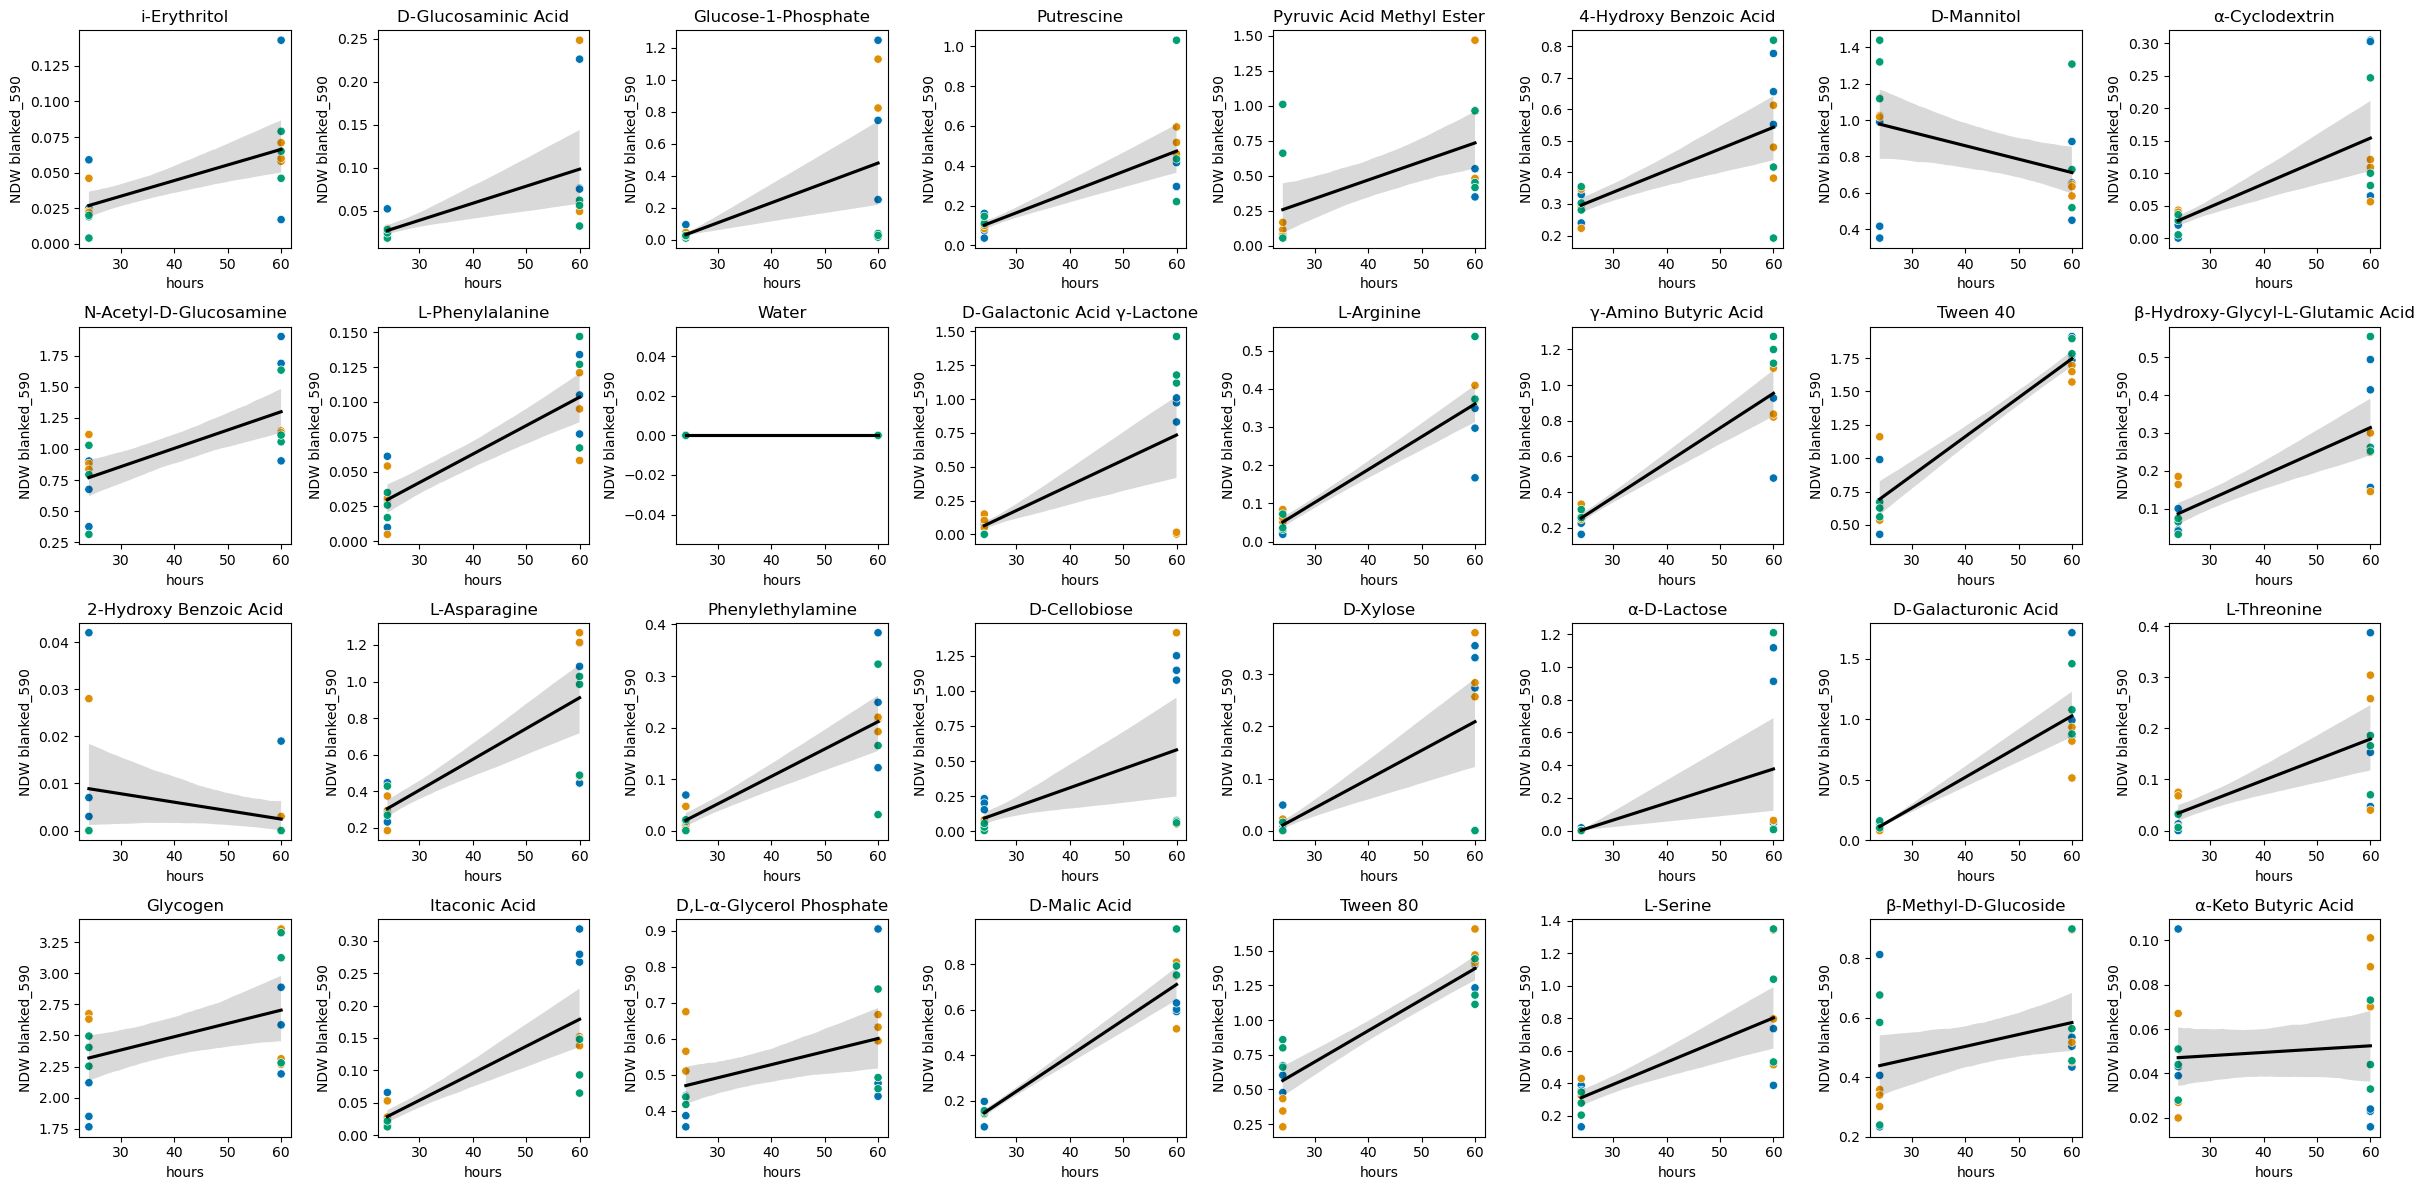

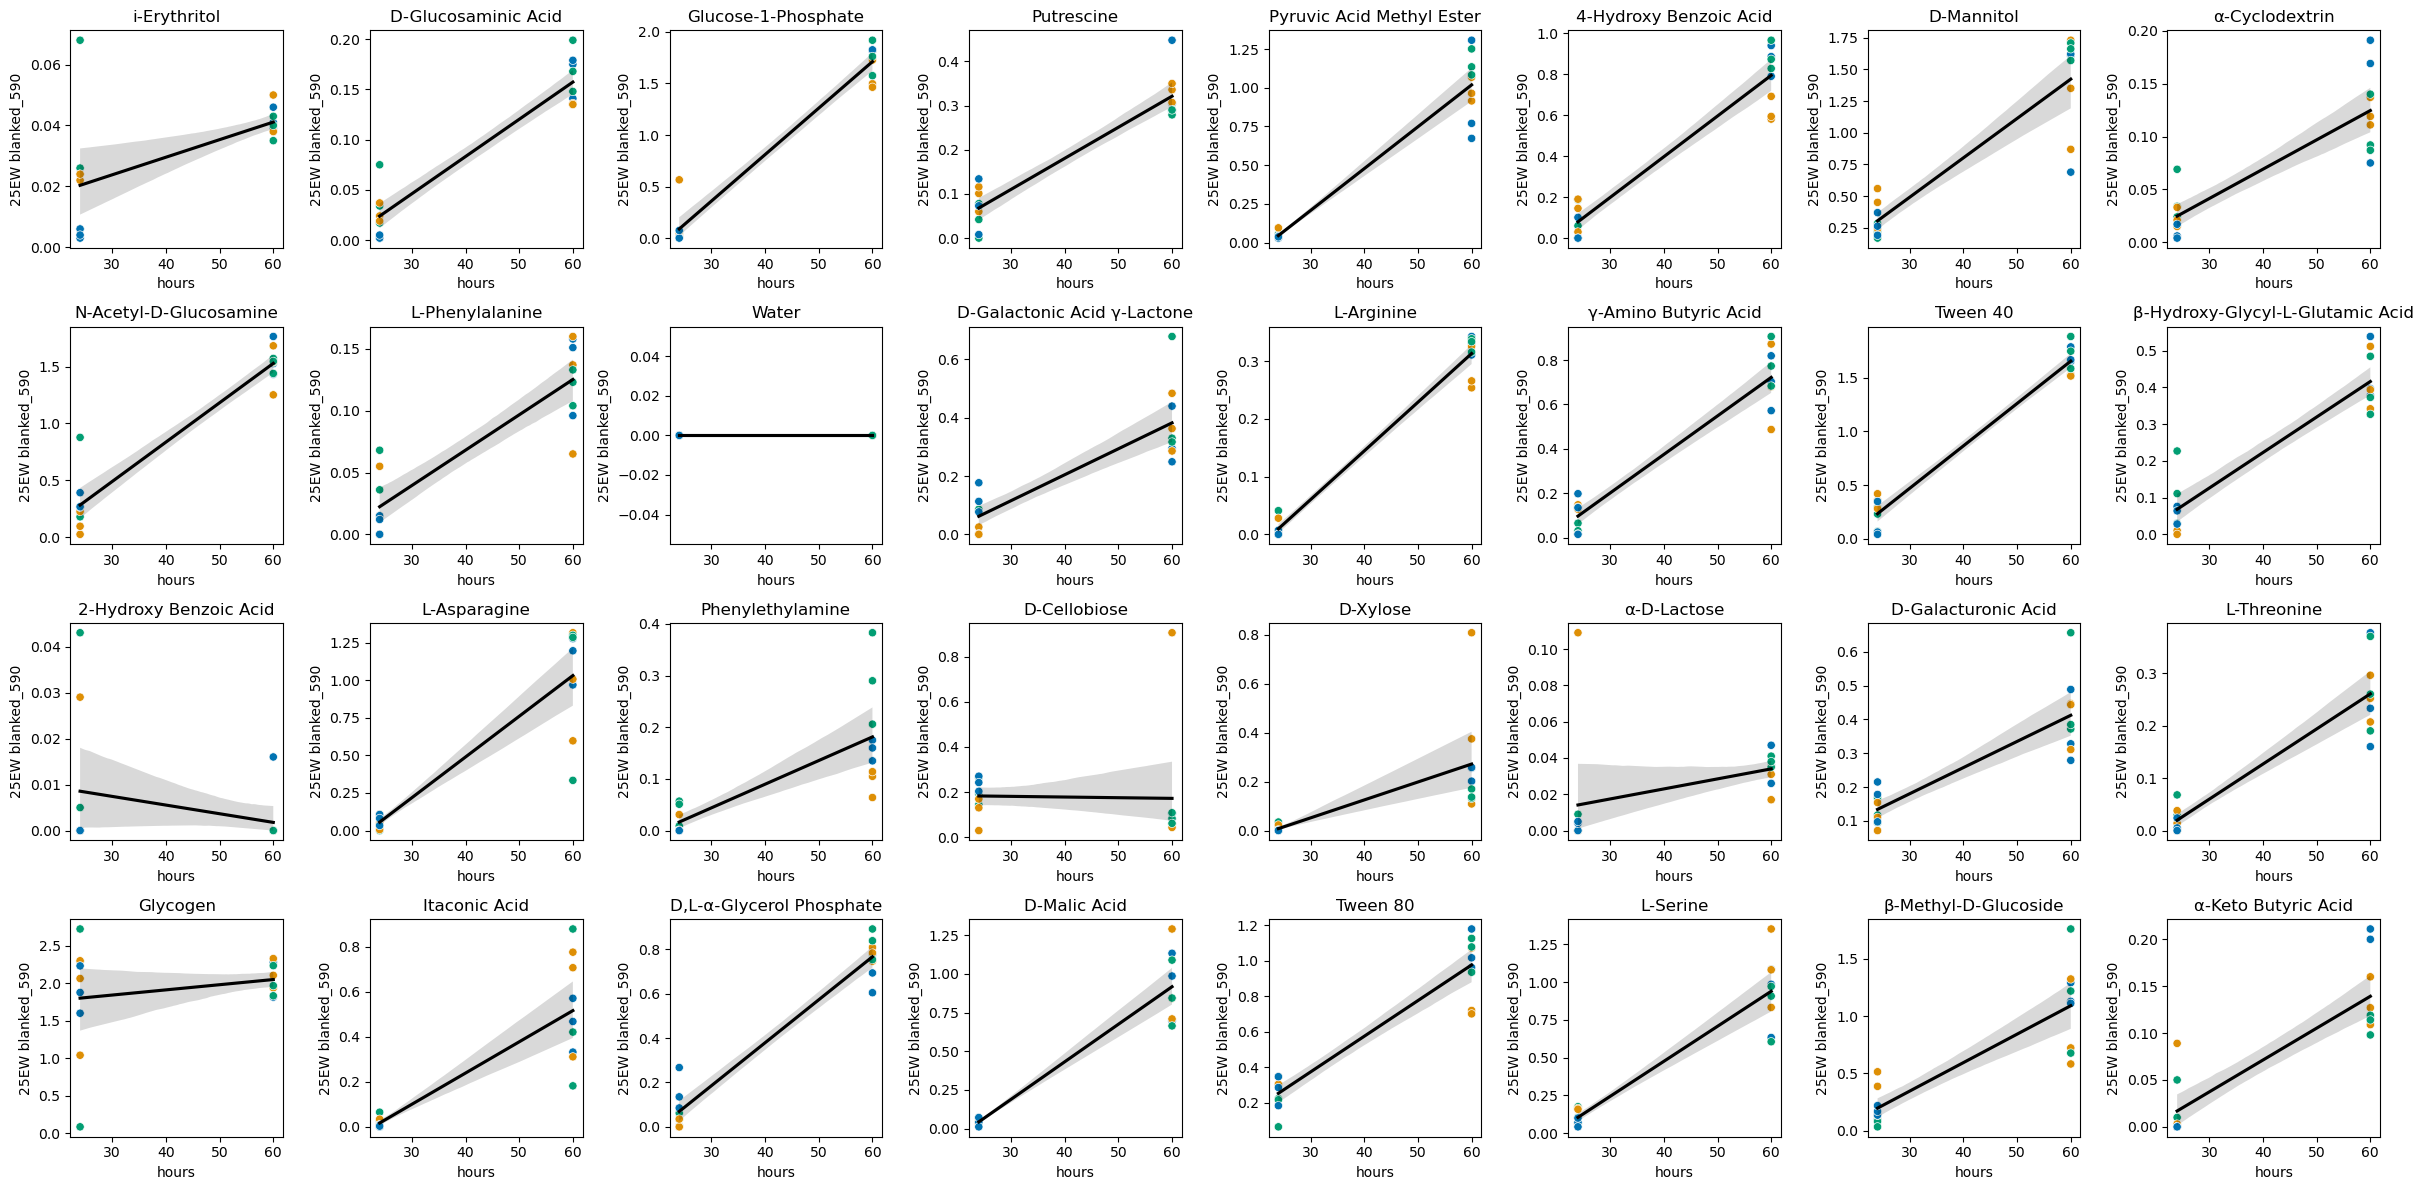

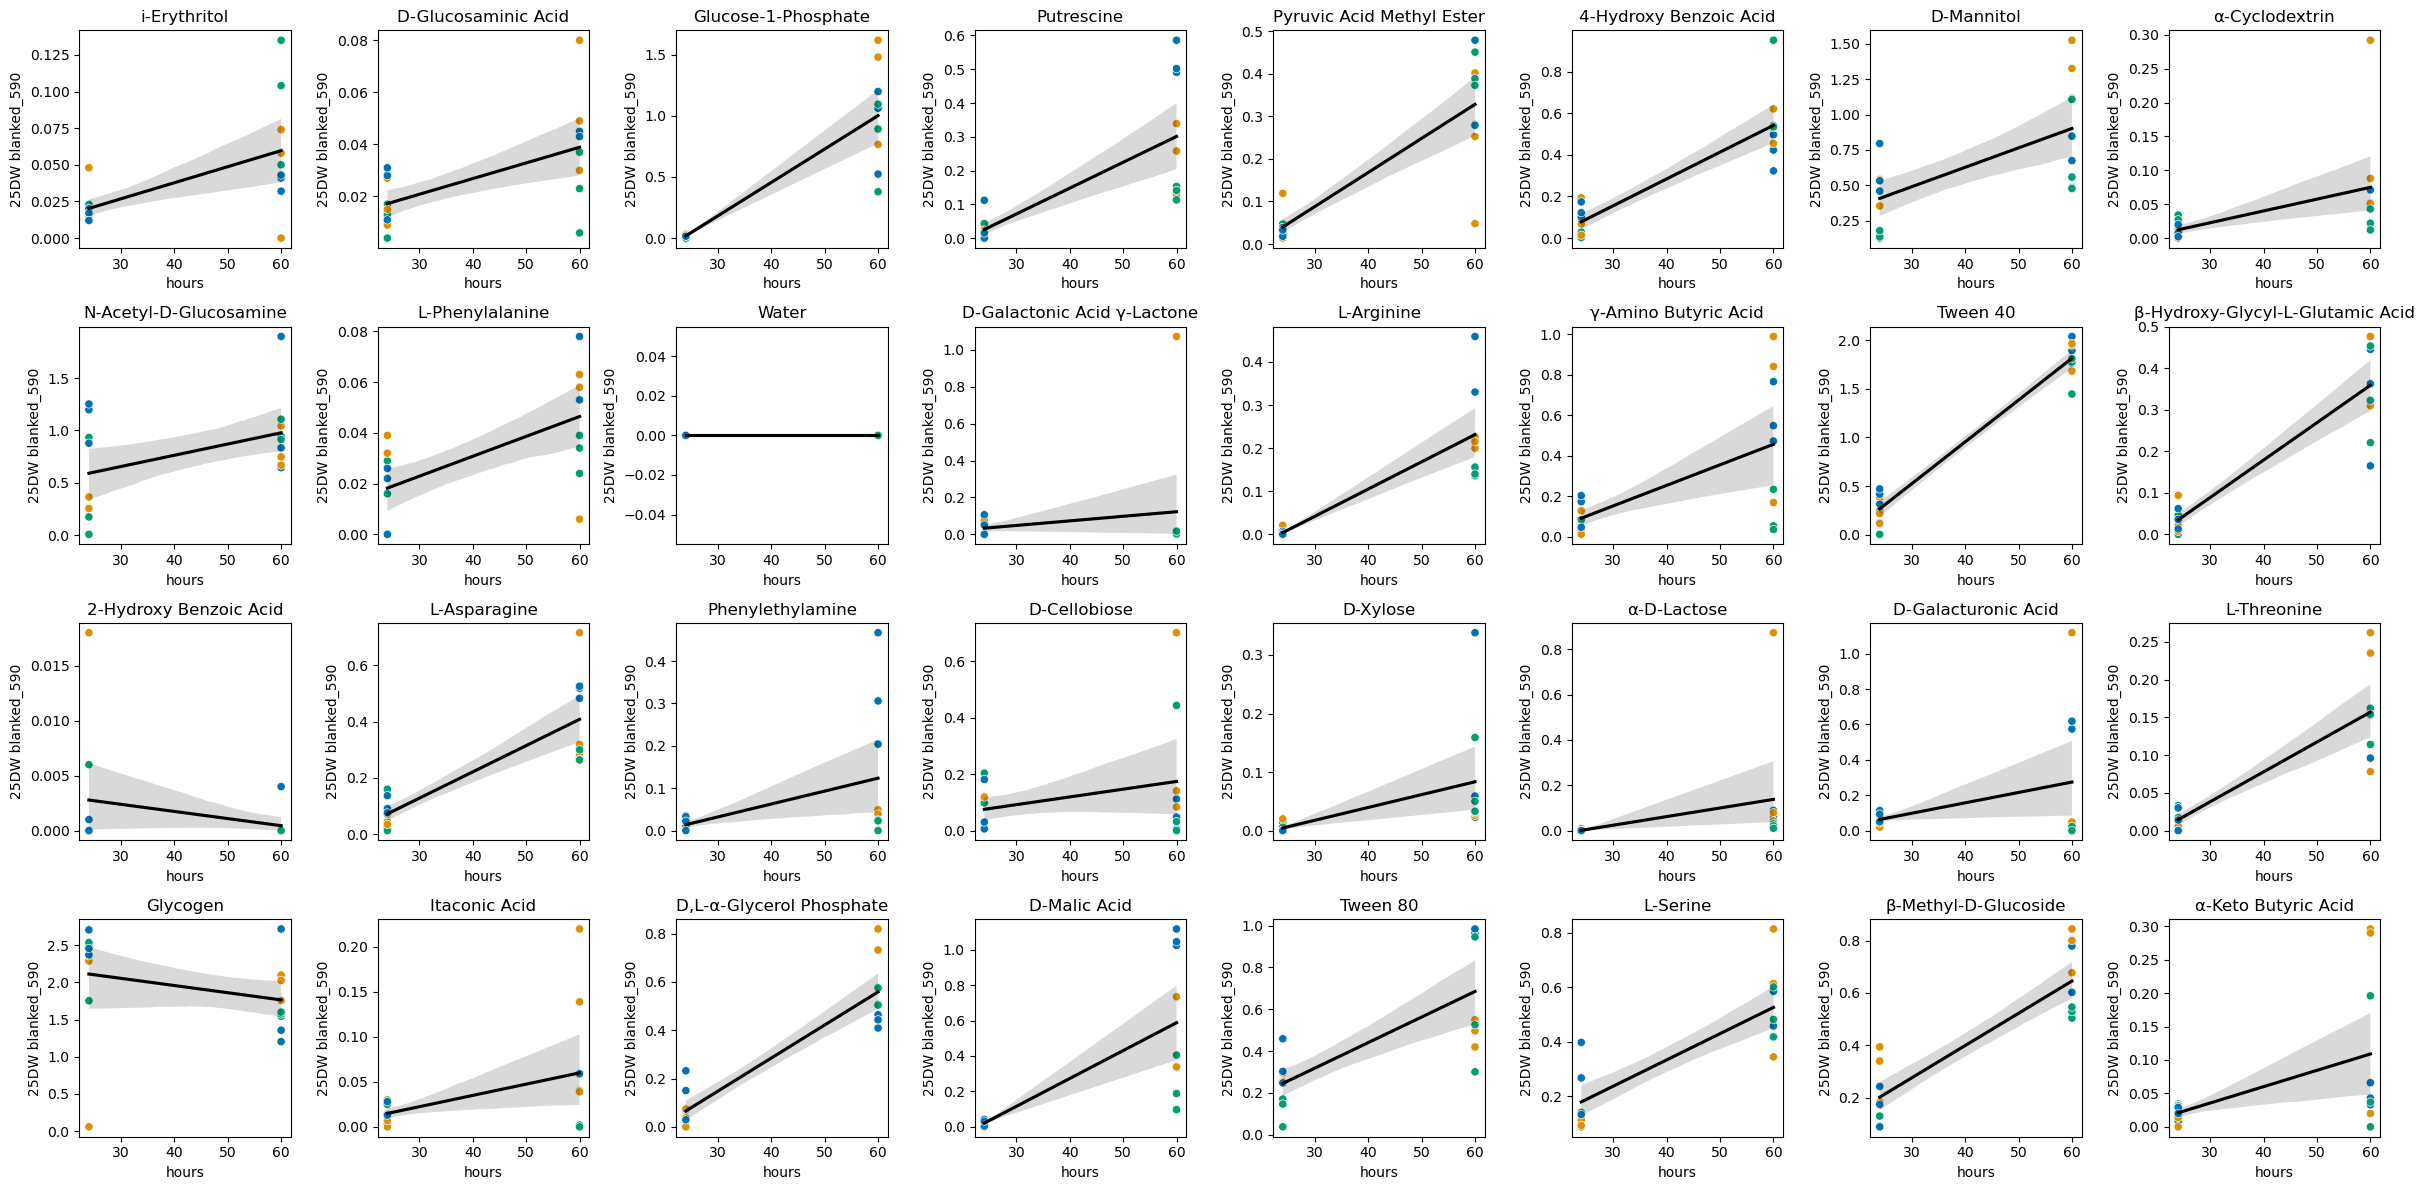

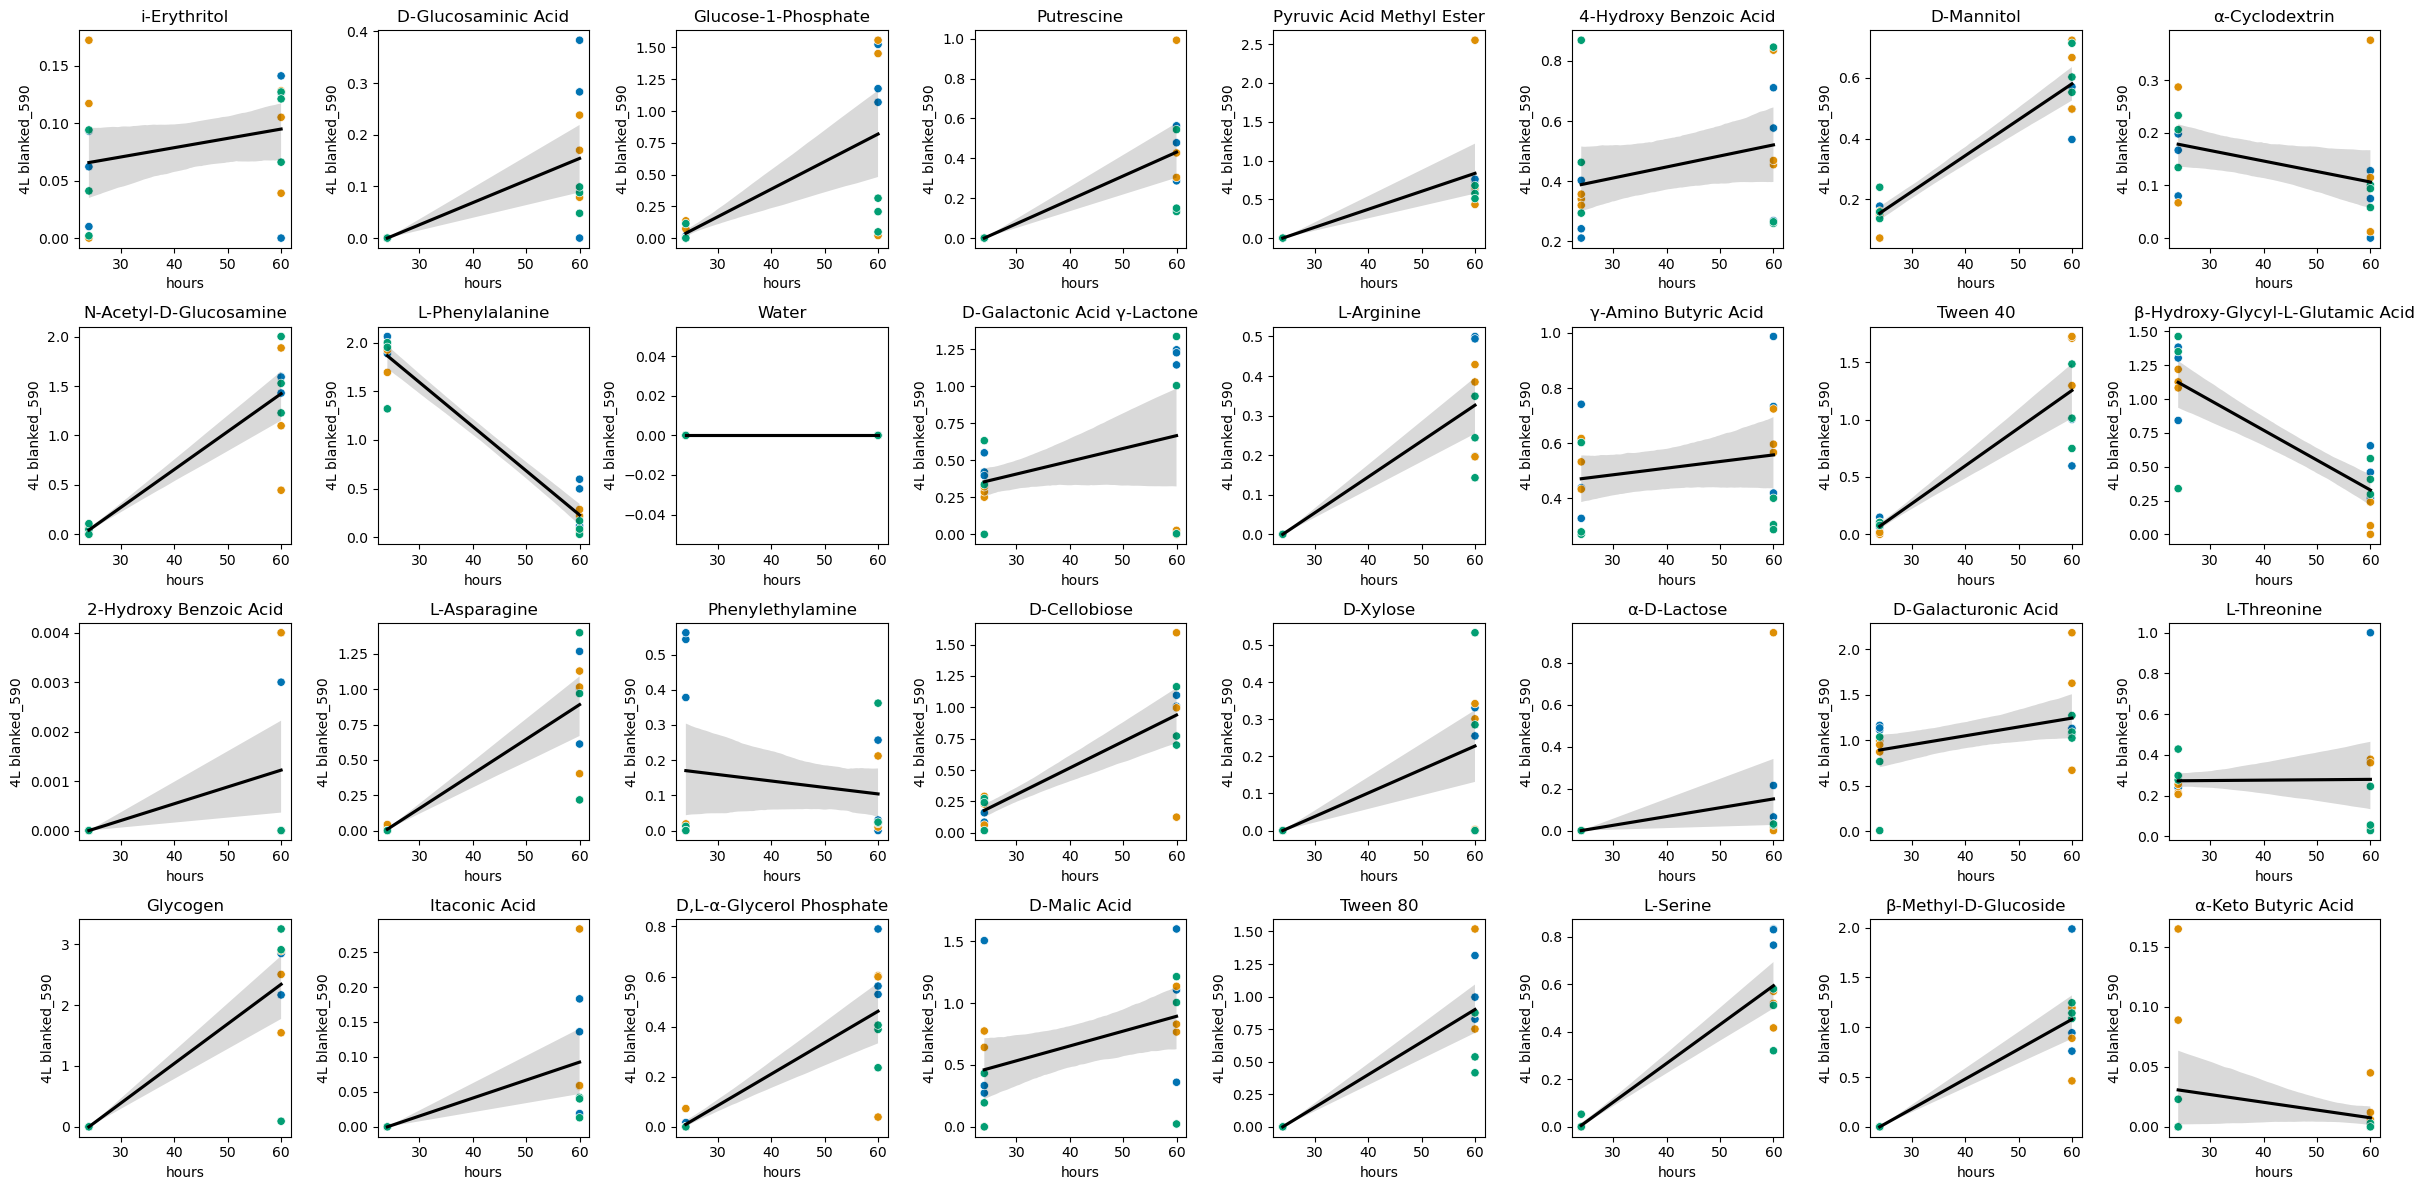

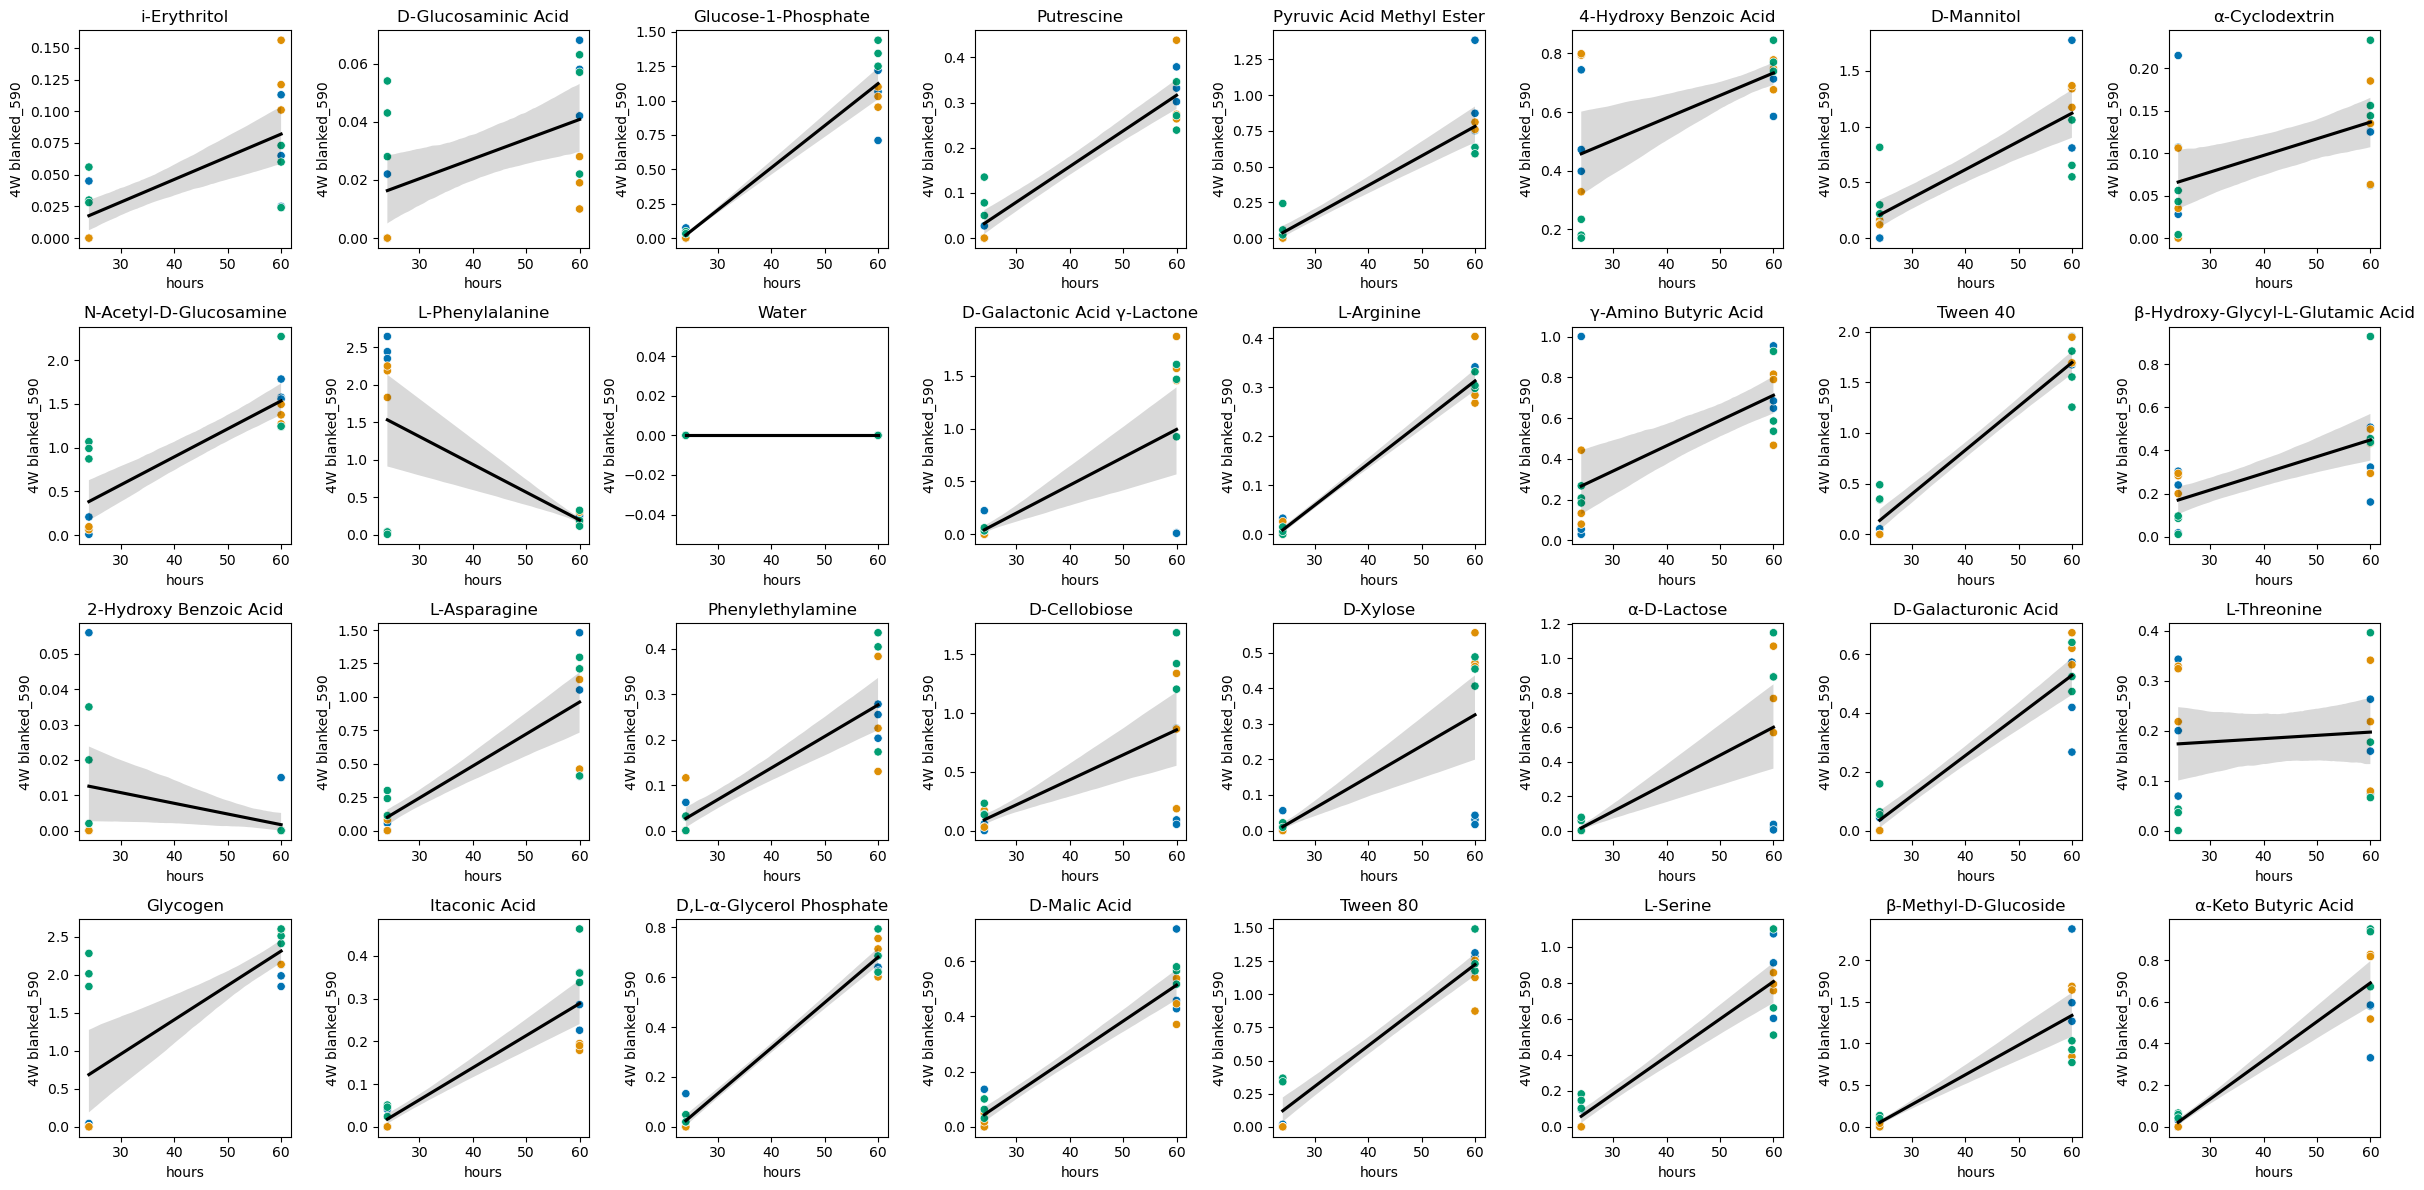

In [31]:
plot_curves(df,
            'dataViz',
            ['diapause','specimen'],
            'rep')

In [27]:
int_df = pd.read_csv('defaultOutput/waterLarvaeIntegration.csv')

int_df.sort_values('trapezoid_integration')

,metab,sample,trapezoid_integration
0,Water,25D_W_1,0.000
553,Water,25E_W_2,0.000
487,Water,25D_W_2,0.000
448,Water,ND_W_3,0.000
419,Water,4_L_1,0.000
...,...,...,...
339,Glycogen,4_W_3,81.948
172,Glycogen,25D_L_2,82.392
576,Glycogen,25E_L_1,83.454
582,Glycogen,ND_W_3,95.286
